In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

plt.style.use('seaborn-v0_8-colorblind')
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.2)

In [64]:
# Read the CSV data
df = pd.read_csv('palluck_et_al_analysis_results.csv')


C:\Users\bar21\AppData\Local\Temp\ipykernel_17328\2050161101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['model'] == 'observed']['model'] = 'Observed'
C:\Users\bar21\AppData\Local\Temp\ipykernel_17328\2050161101.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['model'] == 'observed']['method'] = 'Observed'
C:\Users\bar21\AppData\Local\Temp\ipykernel_17328\2050161101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,post_mean,post_median,post_std,q025,q975,estimand,model,method
0,0.216002,0.214878,0.024745,0.170847,0.268558,stoch_30,observed,observed
1,0.188472,0.184986,0.034320,0.130349,0.264024,stoch_50,observed,observed
2,0.171899,0.164101,0.049089,0.098617,0.286176,stoch_70,observed,observed
3,0.229818,0.229638,0.016556,0.198383,0.263186,stoch_30,one_noisy,onestage
4,0.201569,0.200008,0.022551,0.161583,0.250461,stoch_50,one_noisy,onestage
5,0.178421,0.173669,0.032803,0.126870,0.254519,stoch_70,one_noisy,onestage
6,0.252247,0.251727,0.021672,0.211430,0.295729,stoch_30,repeated_noisy,onestage
7,0.255412,0.253498,0.041190,0.180294,0.341516,stoch_50,repeated_noisy,onestage
8,0.251485,0.244725,0.065190,0.142806,0.394215,stoch_70,repeated_noisy,onestage
9,0.230131,0.229787,0.018416,0.195653,0.267247,stoch_30,multilayer,onestage


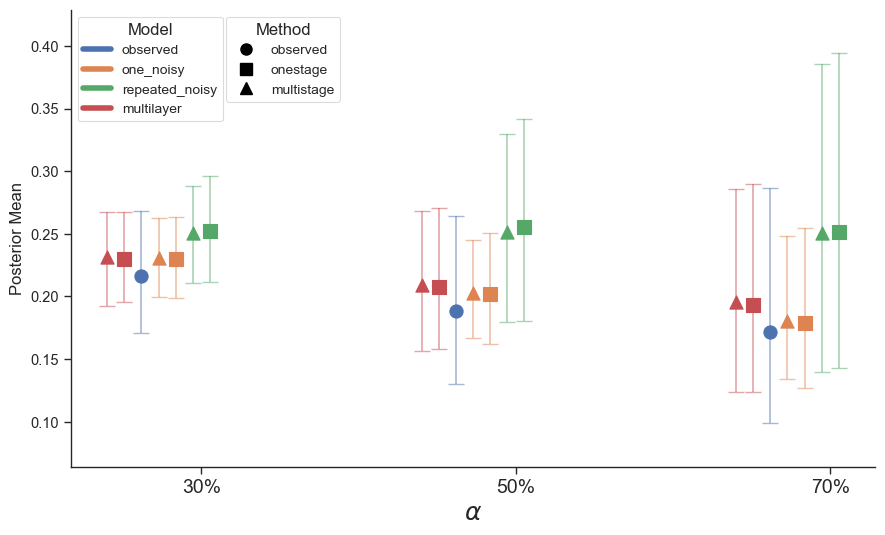

In [59]:

# plot results

# Set the order of estimands
estimand_order = ['stoch_30', 'stoch_50', 'stoch_70']

# Set up the plot
fig, ax = plt.subplots(figsize=(9, 5.5))

# Color palette for models
models = df['model'].unique()
color_palette = sns.color_palette("deep", n_colors=len(models))
color_dict = dict(zip(models, color_palette))

# Marker styles for methods
methods = df['method'].unique()
marker_dict = {'observed': 'o', 'onestage': 's', 'multistage': '^'}

# Calculate the number of unique model-method combinations
n_combinations = len(models) * len(methods)

# Calculate dodge offset
dodge = np.linspace(-0.3, 0.3, n_combinations)

# Plot each model and method combination
for i, (model, method_group) in enumerate(df.groupby(['model', 'method'])):
    data = method_group[method_group['estimand'].isin(estimand_order)].sort_values('estimand')

    if not data.empty:
        x = np.arange(len(estimand_order)) + dodge[i]

        # Plot error bars
        ax.errorbar(x, data['post_mean'],
                     yerr=[data['post_mean'] - data['q025'], data['q975'] - data['post_mean']],
                     fmt='none',  # Don't plot markers here
                     ecolor=color_dict[model[0]],
                     capsize=6,
                     alpha=0.5)

        # Plot points
        ax.scatter(x, data['post_mean'],
                    color=color_dict[model[0]],
                    marker=marker_dict[model[1]],
                    s=90,
                    zorder=10)  # Ensure points are on top

ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel('Posterior Mean', fontsize=12)
# ax.set_title('Posterior Estimates by Model and Method', fontsize=14)

# Set x-ticks to be '30%', '50%', '70%'
ax.set_xticks(range(len(estimand_order)))
ax.set_xticklabels(['30%', '50%', '70%'], fontsize=14)
# ax.set_yticklabels(ax.get_yticks(), fontsize=14)

# Adjust y-axis limits to give some padding
y_min, y_max = ax.get_ylim()
ax.set_ylim(y_min - 0.02, y_max + 0.02)

# Create custom legends
model_legend = [Line2D([0], [0], color=color, lw=4, label=model)
                for model, color in color_dict.items()]
method_legend = [Line2D([0], [0], color='black', marker=marker, linestyle='None',
                        markersize=8, label=method)
                 for method, marker in marker_dict.items()]

# Add legends to the plot
model_leg = ax.legend(handles=model_legend, title='Model', loc='upper left',
                      bbox_to_anchor=(0, 1), fontsize=10, title_fontsize=12,
                      frameon=True, fancybox=True, framealpha=0.7)

# Add the method legend next to the model legend
ax.add_artist(model_leg)  # Ensure the model legend is not overwritten
ax.legend(handles=method_legend, title='Method', loc='upper left',
          bbox_to_anchor=(0.185, 1), fontsize=10, title_fontsize=12,
          frameon=True, fancybox=True, framealpha=0.7)

# Remove top and right spines
sns.despine()

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('palluck_analysis_results.png', dpi=1000, bbox_inches='tight')

# Display the plot
plt.show()

# TODO: move x-axis to center of plot for each \alpha